In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pylab
from scipy import stats

In [33]:
orders = pd.read_csv("df.csv").drop(['Unnamed: 0'],axis=1)

In [34]:
orders.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,CancelledOrder,InternationalOrders,TotalPrice
0,536365,85123A,6,2010-12-01 08:26:00,2.55,C17850,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,0,0,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,C17850,United Kingdom,WHITE METAL LANTERN,0,0,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,C17850,United Kingdom,CREAM CUPID HEARTS COAT HANGER,0,0,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,C17850,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,0,0,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,C17850,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,0,0,20.34


In [35]:
# InvoiceDate sütununu datetime objesine çevir
orders.InvoiceDate = pd.to_datetime(orders.InvoiceDate)

# Datetime objesini sütuna geri ekleme
orders['InvoiceDate'] = orders.InvoiceDate.dt.date

### Elimizde hiç iptal edilen sipariş var mı diye tekrar kontrol ediyoruz

In [36]:
print(orders[(orders.InvoiceNo.str.startswith('C')) & (orders.TotalPrice>0)])
print(orders[(orders.InvoiceNo.str.startswith('C')) & (orders.Quantity>0)])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Description, CancelledOrder, InternationalOrders, TotalPrice]
Index: []
Empty DataFrame
Columns: [InvoiceNo, StockCode, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Description, CancelledOrder, InternationalOrders, TotalPrice]
Index: []


In [37]:
orders = orders.groupby(['InvoiceDate','StockCode'],as_index=False).sum()
orders.InvoiceDate = pd.to_datetime(orders.InvoiceDate)

In [38]:
orders['Year'] = orders.InvoiceDate.dt.year
orders['Quarter'] = orders.InvoiceDate.dt.quarter
orders['Month'] = orders.InvoiceDate.dt.month
orders['Week'] = orders.InvoiceDate.dt.week
orders['Weekday'] = orders.InvoiceDate.dt.weekday
orders['Day'] = orders.InvoiceDate.dt.day
orders['Dayofyear'] = orders.InvoiceDate.dt.dayofyear
orders['UnitPrice'] = orders.TotalPrice/orders.Quantity

<ipython-input-38-e719981d5dce>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  orders['Week'] = orders.InvoiceDate.dt.week


In [39]:
orders.head()

,InvoiceDate,StockCode,Quantity,UnitPrice,CancelledOrder,InternationalOrders,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear
0,2010-12-01,10002,60,0.85,0,1,51.00,2010,4,12,48,2,1,335
1,2010-12-01,10125,2,0.85,0,0,1.70,2010,4,12,48,2,1,335
2,2010-12-01,10133,5,0.85,0,0,4.25,2010,4,12,48,2,1,335
3,2010-12-01,15044B,1,2.95,0,0,2.95,2010,4,12,48,2,1,335
4,2010-12-01,15056BL,20,5.65,0,0,113.00,2010,4,12,48,2,1,335


### Hala satış miktarının 0 dan küçük olduğu değerlerimiz var

In [40]:
orders[orders.Quantity < 0]

,InvoiceDate,StockCode,Quantity,UnitPrice,CancelledOrder,InternationalOrders,TotalPrice,Year,Quarter,Month,Week,Weekday,Day,Dayofyear
49,2010-12-01,20957,-1,1.45,1,1,-1.45,2010,4,12,48,2,1,335
112,2010-12-01,21218,-3,3.75,1,1,-11.25,2010,4,12,48,2,1,335
392,2010-12-01,22245,-2,0.85,1,1,-1.70,2010,4,12,48,2,1,335
527,2010-12-01,22580,-3,5.95,1,1,-17.85,2010,4,12,48,2,1,335
692,2010-12-01,22892,-7,1.25,1,1,-8.75,2010,4,12,48,2,1,335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224127,2011-12-08,85048,-2,7.95,1,0,-15.90,2011,4,12,49,3,8,342
224139,2011-12-08,85127,-5,4.95,1,1,-24.75,2011,4,12,49,3,8,342
224191,2011-12-09,20979,-5,1.25,1,0,-6.25,2011,4,12,49,4,9,343
224460,2011-12-09,23144,-11,0.83,1,0,-9.13,2011,4,12,49,4,9,343


### 0 dan küçük değerleri çıkartıyoruz ve Satış miktarı ve toplam ücretteki istenmeyen değerleri(outliers) siliyoruz

In [41]:
orders = orders.drop(orders[orders.Quantity<=0].index).reset_index(drop=True)
orders = orders.drop(orders[orders.TotalPrice<=0].index).reset_index(drop=True)

# Burada zscore hesaplamasından yararlanıp modelimizi doğru sonuçtan uzaklaştıracak olan Quantity ve TotalPrice değerlerimizi 
# çıkartıyoruz
orders = orders[(np.abs(stats.zscore(orders.Quantity)) < 3)]
orders = orders[(np.abs(stats.zscore(orders.TotalPrice)) < 3)]

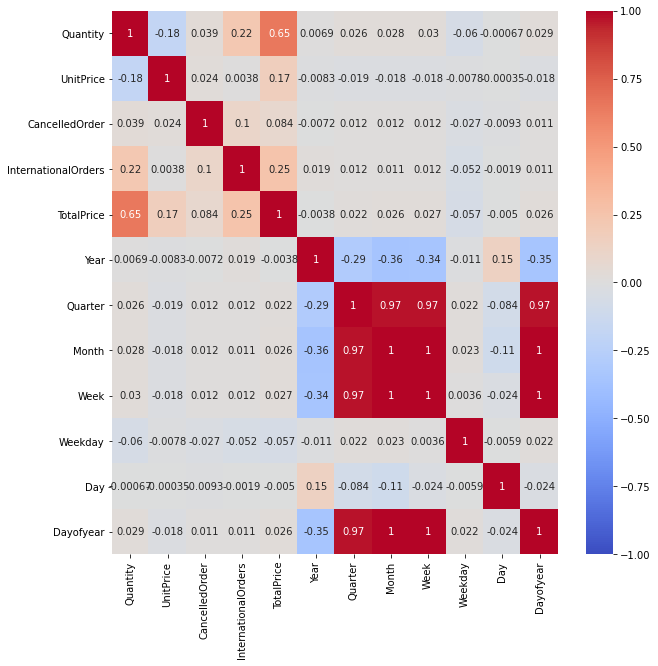

In [42]:
corrmat = orders.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

g=sns.heatmap(orders[top_corr_features].corr(),annot=True,cmap="coolwarm",vmin=-1,vmax=1,center=0)

### 1)Isı haritasına baktığımızda Quarter, Month, Dayofyear ve Week sütunları arasında güçlü bir korelasyon bağı olduğunu görüyoruz. O yüzden diğer eklediğimiz verileri çıkartıp daha iyi sonuç almayı hedefliyoruz.

In [43]:
orders.drop(['Month', 'Quarter','Dayofyear','Year'], axis=1,inplace=True)

In [44]:
orders.head()

,InvoiceDate,StockCode,Quantity,UnitPrice,CancelledOrder,InternationalOrders,TotalPrice,Week,Weekday,Day
0,2010-12-01,10002,60,0.85,0,1,51.00,48,2,1
1,2010-12-01,10125,2,0.85,0,0,1.70,48,2,1
2,2010-12-01,10133,5,0.85,0,0,4.25,48,2,1
3,2010-12-01,15044B,1,2.95,0,0,2.95,48,2,1
4,2010-12-01,15056BL,20,5.65,0,0,113.00,48,2,1


In [45]:
orders.to_csv("data.csv")